<a href="https://colab.research.google.com/github/marquesgabi/Doutorado/blob/master/PSD_hist_FINAL_CNN_B_Amostra8_r_squared%2BMC_set_13_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7 MB 4.7 MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 461, done.
remote: Counting objects: 100% (211/211), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 461 (delta 100), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (461/461), 166.07 MiB | 28.52 MiB/s, done.
Resolving deltas: 100% (223/223), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [7]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[9] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [8]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 22.55 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [9]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [10]:
df=Segmenta(img)
Img_Size = 28

In [11]:
print(df)

    Width           0           1  ...         781         782         783
0     175   58.609600   94.932793  ...   89.487999  106.295990  100.558395
1     125   92.317001   94.175171  ...  104.423103  105.385414  105.921219
2     162   46.053349   40.332268  ...   23.907330   19.141747    9.695320
3     146   44.341530   43.520363  ...   90.607246   85.204910   84.259903
4     120    0.318889    0.981111  ...    0.076667    0.778889    0.964444
5     136   34.933395   36.087372  ...    7.882353    7.660034    7.734429
6     186    1.061857    0.524454  ...   42.003242   75.260727   90.068451
7     115   53.465023   66.925293  ...   75.588501   80.423965   80.733078
8     145   34.678905   32.511490  ...   37.898453   30.145302   21.273102
9     162   99.451004   96.507545  ...   62.285473   82.081993  100.768478
10    198   53.303944   52.501575  ...   77.391380   77.451477   50.222012
11    148   93.002930   94.066467  ...    6.669832    8.569029    9.103725
12    128   62.907227   6

In [12]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [13]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 22.69 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [14]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [15]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [16]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:

# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 3s 158ms/step - loss: 0.5966 - accuracy: 0.7318 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 2/200
11/11 [==============================] - 1s 130ms/step - loss: 0.2372 - accuracy: 0.9038 - val_loss: 0.6933 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 134ms/step - loss: 0.2160 - accuracy: 0.9213 - val_loss: 0.6934 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 133ms/step - loss: 0.1431 - accuracy: 0.9446 - val_loss: 0.6936 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 1s 133ms/step - loss: 0.0954 - accuracy: 0.9650 - val_loss: 0.6934 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 1s 133ms/step - loss: 0.0823 - accuracy: 0.9592 - val_loss: 0.6956 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 135ms/step - loss: 0.0566 - accuracy: 0.9708 - val_loss: 0.6983 - val_accuracy: 0.5102

In [18]:
Y_test = yback(Y_test)

In [19]:
pred_test= model.predict(X_test)
Rows, Cols = pred_test.shape
Prediction =[]
for i in range(Rows):
  if(pred_test[0,0] > pred_test[0,1]):
    Prediction.append(0)
  else:
    Prediction.append(1)

In [20]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        71   1
1         3  72


In [21]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.99      0.96      0.97        75

    accuracy                           0.97       147
   macro avg       0.97      0.97      0.97       147
weighted avg       0.97      0.97      0.97       147



In [22]:
#pred_test

In [23]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[9] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  prediction_02 = model.predict(result)
  Rows, Cols = prediction_02.shape
  Prediction =[]
  for i in range(Rows):
    if(prediction_02[0,0] > prediction_02[0,1]):
      Prediction.append(0)
    else:
      Prediction.append(1)
  loc_grao =[];k=0
  for i in Prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
0   179.0   52.163235   15.510565  ...   44.692955   41.735775   42.817635
1   120.0  145.080002  151.841110  ...   77.135559   71.853333   58.480003
2   100.0   99.177605  103.755203  ...   99.481606  101.734398  103.833603
3   169.0   72.398087   71.803856  ...    6.015511    6.551766    6.219424
4   161.0    0.340265    1.500945  ...    0.714556    1.017013    0.778828
5   178.0    1.512941    0.255523  ...   59.439720   70.301987   75.372307
6   177.0  100.857697   71.014297  ...   94.110016   95.251259   95.548172
7   117.0   70.173859   69.134926  ...   95.142456  101.564468  105.394989
8   164.0   56.715645   58.622250  ...   38.963116   38.464607   38.874481
9   168.0   45.111111   44.305557  ...   56.555557   53.694447   56.527779
10  139.0    2.031934    0.962321  ...   41.298584   39.758446   33.058071
11  196.0    0.897959    0.877551  ...   75.204079   85.204079   52.979591
12  169.0   51.406811   5

In [24]:
Width=np.array(Width_new)

In [25]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 692, done.
remote: Counting objects: 100% (453/453), done.
remote: Compressing objects: 100% (451/451), done.
remote: Total 692 (delta 285), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (692/692), 5.65 MiB | 11.56 MiB/s, done.
Resolving deltas: 100% (422/422), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [26]:
#!git clone https://github.com/ucfilho/marquesgabi_out_2020
!git clone https://github.com/marquesgabi/Doutorado

%cd Doutorado

PSD_imageJ = 'Amostra8.csv' 
PSD_new = pd.read_csv(PSD_imageJ,sep=';')
#encoding='utf8'
print(PSD_new.head(3))

Cloning into 'Doutorado'...
remote: Enumerating objects: 461, done.
remote: Counting objects: 100% (211/211), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 461 (delta 100), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (461/461), 166.07 MiB | 27.74 MiB/s, done.
Resolving deltas: 100% (223/223), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/Doutorado
   Unnamed: 0   Area
0           1  0.807
1           2  1.407
2           3  1.177


In [27]:
PSD_new.shape

(99, 2)

In [28]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [29]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,179.0,52.163235,15.510565,10.676321,5.906558,6.738086,11.988235,19.629631,28.087048,41.272713,57.033337,72.982368,80.360039,79.341667,78.220222,77.635033,79.475800,82.287819,83.745201,80.789993,67.129112,36.530228,31.412846,29.988110,24.978214,45.844608,70.978531,78.238564,77.960991,51.937332,27.297026,17.547268,10.853094,11.008739,16.663992,21.303923,29.629753,42.883400,61.376144,73.711807,...,34.577946,57.038670,87.949593,100.308571,104.718300,104.048225,99.902153,85.732750,52.827534,44.827225,44.514839,44.572643,93.085945,97.171219,109.867363,110.902214,99.254204,91.245590,89.091698,89.217232,89.778625,94.385727,92.494492,80.607910,75.447083,69.041229,47.324490,37.971539,55.878906,92.811714,101.627579,103.060684,106.675171,106.492966,103.833122,100.172501,82.082863,44.692955,41.735775,42.817635
1,120.0,145.080002,151.841110,160.426682,169.080017,173.614441,177.757782,182.800003,183.187775,173.813339,141.490005,48.902225,49.250004,55.801109,55.208889,56.335556,56.977776,57.815563,59.804443,60.687782,62.827778,65.901108,69.246666,71.698891,75.526672,92.028893,98.070000,90.308891,83.202225,143.661118,151.878906,163.885544,170.043335,176.085556,179.663330,185.431122,192.291107,196.866669,171.517776,51.424446,...,89.820007,89.101105,88.244438,92.635559,99.056671,97.003334,86.458893,78.354446,73.510002,69.409996,58.793335,41.255558,76.036667,78.496674,83.902214,87.273331,88.527786,90.442230,93.346672,96.228889,99.883331,107.055550,116.520004,111.793343,104.921120,97.952225,91.976662,88.557777,88.244453,88.953339,89.645561,90.664444,91.895561,91.035553,85.163330,78.597778,77.660004,77.135559,71.853333,58.480003
2,100.0,99.177605,103.755203,106.849602,102.721603,101.267197,96.436806,96.568001,94.543999,90.478401,84.006393,78.894394,74.096001,72.736000,74.137596,75.651199,76.769600,76.496002,75.979202,76.503998,76.884796,76.403198,74.588806,71.982399,70.086403,67.119995,70.577599,74.321602,76.476791,89.204803,95.358398,96.646400,91.132805,87.929596,85.793594,83.183998,79.027206,72.755203,69.900803,71.015999,...,97.832001,98.657600,98.332802,97.553604,98.073601,99.070396,99.694405,100.248009,102.363205,104.264000,105.723206,108.830399,90.931206,87.508804,85.231995,86.335999,89.686401,93.363197,93.481606,94.363197,94.062401,95.662399,94.694397,94.169601,95.782402,97.923203,100.403198,102.793602,104.694397,104.793594,103.755203,102.035202,99.063995,97.924797,97.659195,97.484802,97.513596,99.481606,101.734398,103.833603
3,169.0,72.398087,71.803856,72.585587,74.430405,77.389648,78.481003,79.622581,80.576477,78.700775,78.968338,76.404144,56.346798,32.967297,40.549732,46.901157,52.031933,53.112736,64.205269,76.828438,85.259010,89.051437,93.182732,98.887634,98.524551,95.502289,92.721359,89.787224,88.731438,76.360069,75.714844,74.067818,75.649063,77.704422,80.678192,80.960289,80.053871,77.496483,78.553650,80.020683,...,0.167221,0.133679,0.564651,0.446728,0.271804,0.283078,0.360947,0.445047,0.432303,0.491124,0.275446,0.325444,8.263821,16.101360,15.516508,14.327613,11.272959,9.095936,7.246875,7.178250,6.582858,6.502748,7.538181,8.163719,6.572389,6.470922,6.646861,5.844928,6.009033,6.026890,6.185112,6.593221,6.618151,6.395119,5.880991,6.100801,6.064528,6.015511,6.551766,6.219424
4,161.0,0.340265,1.500945,6.181475,12.816637,19.402649,27.387526,37.493385,46.476372,46.463139,43.710777,40.047256,37.771271,42.213612,48.417770,57.374294,63.495270,66.686203,72.565224,67.996223,65.969757,74.829865,85.926277,90.105865,93.319473,103.512299,103.436668,100.028351,99.986763,0.143667,1.637051,7.062383,18.907373,26.952742,36.449909,43.466919,48.858227,50.500946,49.223064,46.678638,...,0.211720,0.362949,0.720227,0.671078,0.041588,0.362949,0.347826,0.018904,0.302457,1.062382,1.069943,0.

In [30]:
PSD_new.head()

,Unnamed: 0,Area
0,1,0.807
1,2,1.407
2,3,1.177
3,4,1.289
4,5,1.743


In [31]:
#lost_value = float(PSD_new.columns[1])

# Area = np.array(PSD_new.iloc[:,1])
Area = PSD_new['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )
# Area = np.concatenate( (Area, [lost_value] ) )
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [32]:
PSD_new

,Unnamed: 0,Area
0,1,0.807
1,2,1.407
2,3,1.177
3,4,1.289
4,5,1.743
...,...,...
94,28,2.097
95,29,1.871
96,30,1.315
97,31,1.034


In [33]:
PSD_new.iloc[:,1].values

array([0.807, 1.407, 1.177, 1.289, 1.743, 1.425, 2.553, 0.968, 1.43 ,
       0.722, 1.235, 1.058, 1.342, 1.207, 1.682, 1.474, 1.997, 1.187,
       2.082, 2.877, 1.386, 1.176, 0.96 , 1.147, 1.02 , 1.249, 1.704,
       1.602, 1.303, 1.707, 2.264, 1.233, 0.84 , 1.105, 1.343, 0.811,
       2.03 , 1.844, 2.266, 1.472, 1.009, 1.851, 0.941, 2.252, 1.269,
       1.082, 1.065, 1.995, 2.063, 0.969, 1.389, 1.721, 1.355, 1.178,
       1.529, 1.371, 1.423, 2.756, 0.854, 0.811, 0.69 , 1.752, 0.978,
       1.108, 1.149, 0.994, 1.594, 1.492, 1.322, 1.564, 1.29 , 1.057,
       1.193, 1.413, 1.477, 2.21 , 1.27 , 1.865, 1.088, 2.316, 1.855,
       0.882, 1.587, 1.075, 2.179, 1.749, 0.957, 1.24 , 1.586, 2.507,
       1.864, 1.281, 2.137, 1.282, 2.097, 1.871, 1.315, 1.034, 2.095])

In [34]:
X.shape

(490, 784)

<BarContainer object of 6 artists>

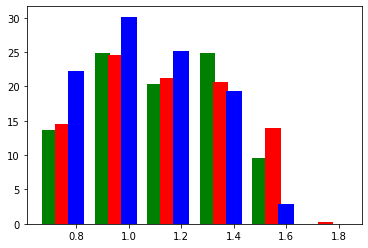

In [35]:
Freq = [13.6, 24.8, 20.4, 24.8, 9.6, 0.]
Freq2 = [14.6, 24.6, 21.2, 20.6, 14., 0.2]
Freq3 = [22.22489, 30.15078, 25.10463, 19.30926, 2.810434, 0.]
barWidth = 0.25

br1 = range(len(Freq))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]

xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)

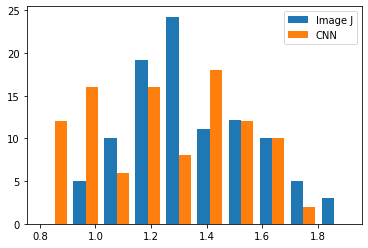

In [36]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

(array([[0.        , 0.05050505, 0.15151515, 0.34343434, 0.58585859,
         0.6969697 , 0.81818182, 0.91919192, 0.96969697, 1.        ],
        [0.12      , 0.28      , 0.34      , 0.5       , 0.58      ,
         0.76      , 0.88      , 0.98      , 1.        , 1.        ]]),
 array([0.79727383, 0.90893898, 1.02060413, 1.13226928, 1.24393443,
        1.35559958, 1.46726473, 1.57892988, 1.69059503, 1.80226018,
        1.91392533]),
 <a list of 2 Lists of Patches objects>)

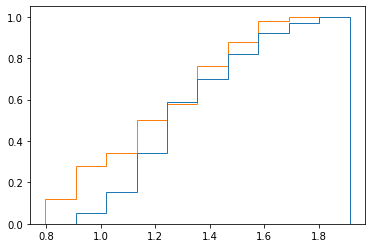

In [37]:
# plt.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,label='Reversed emp.')
plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')

r_squared = 0.8976206473247702


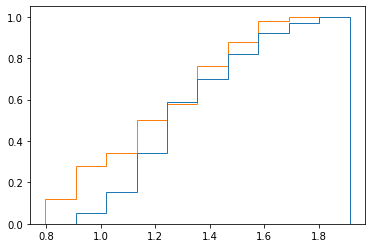

In [38]:
Obj = plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')
Y1, Y2 = Obj[0]
Rsquared = r2_score(Y1, Y2)
print('r_squared =',Rsquared)

In [39]:
acc_train = r.history['accuracy'][-1]
acc_test = r.history['val_accuracy'][-1]
loss_train = r.history['loss'][-1]
loss_test = r.history['val_loss'][-1]

In [40]:
df = pd.DataFrame({'N1':N1, 'N2':N2,'R^2':Rsquared,
                   'acc train':acc_train,'acc test':acc_test,
                   'loss train':loss_train,'loss test':loss_test,
                   'Details':Description},
                  index= [0])


In [41]:
df

,N1,N2,R^2,acc train,acc test,loss train,loss test,Details
0,20,20,0.897621,1.0,0.972789,0.000015,0.20602,"3 layers of Convolution: 64, 128, 256"


<a list of 2 Lists of Patches objects>
[0.79727383 0.90893898 1.02060413 1.13226928 1.24393443 1.35559958
 1.46726473 1.57892988 1.69059503 1.80226018 1.91392533]
[[ 0.          5.05050505 10.1010101  19.19191919 24.24242424 11.11111111
  12.12121212 10.1010101   5.05050505  3.03030303]
 [12.         16.          6.         16.          8.         18.
  12.         10.          2.          0.        ]]


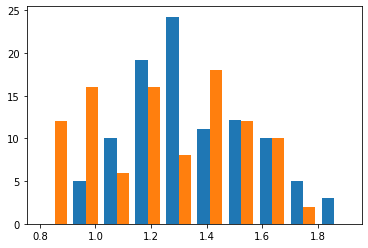

In [42]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [43]:
print(counts.sum())

200.00000000000003


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


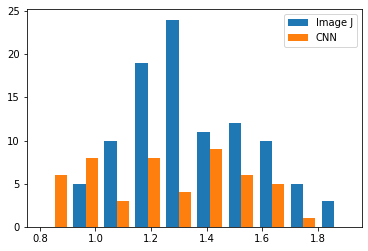

In [44]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [45]:
[Diam1,Diameter_All]

[[1.0136588738827657,
  1.3384498643738487,
  1.2241743928678164,
  1.2810955363139882,
  1.4897169283032898,
  1.3469841688927182,
  1.802936648279376,
  1.1101783096888704,
  1.349345229721172,
  0.9587903583676608,
  1.2539740179716348,
  1.1606409601292735,
  1.3071677279655385,
  1.2396774300177211,
  1.4634168627716928,
  1.369947111730825,
  1.5945718456175375,
  1.2293637946517857,
  1.6281537802488464,
  1.9139253303624628,
  1.3284238815238665,
  1.2236542422631285,
  1.1055812783082735,
  1.2084724894722394,
  1.1396070970426018,
  1.2610615335399848,
  1.4729562736988213,
  1.428191076384995,
  1.2880338220675407,
  1.474252319944901,
  1.697826354277848,
  1.2529582429827641,
  1.034176589165282,
  1.1861406733319428,
  1.3076546595257188,
  1.016167934339702,
  1.607692842495848,
  1.5322707725763225,
  1.6985761120332168,
  1.3690173884396646,
  1.1334454996327699,
  1.5351763407845973,
  1.09458595441189,
  1.6933208363283037,
  1.2711180048559307,
  1.1737313097142148,

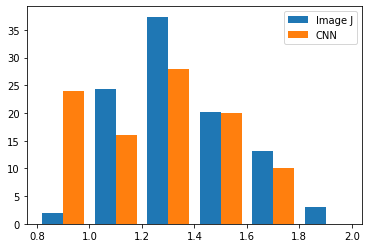

In [46]:
 bins_list = [0.8, 1.0, 1.2, 1.4,1.6, 1.8,2.0]
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts,bins = bins_list)
plt.legend(['Image J','CNN'])

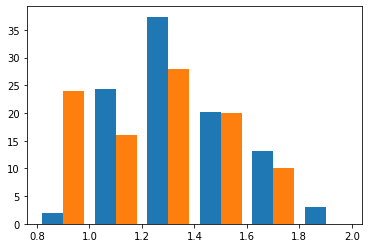

In [47]:
yy = plt.hist(X,weights=wts,bins = bins_list)

In [48]:
yy[0][0]

array([ 2.02020202, 24.24242424, 37.37373737, 20.2020202 , 13.13131313,
        3.03030303])

In [49]:
bins_list

[0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]

In [50]:
k =0
for kk in yy[0][0]:
  name = str(bins_list[k])
  df[name] = yy[0][1][k]
  k = k+1

In [51]:
df

,N1,N2,R^2,acc train,acc test,loss train,loss test,Details,0.8,1.0,1.2,1.4,1.6,1.8
0,20,20,0.897621,1.0,0.972789,0.000015,0.20602,"3 layers of Convolution: 64, 128, 256",24.0,16.0,28.0,20.0,10.0,0.0


In [52]:
Arq = "output.xlsx"
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>